In [47]:
import sys
sys.path.append('/home/yainoue/meg2image/codes/MEG-decoding')
from meg_decoding.utils.layout import ch_locations_2d
from meg_decoding.matlab_utils.load_meg import roi
import matplotlib.pyplot as plt
import numpy as np
from hydra import initialize, compose
import json
import csv
%matplotlib inline

with initialize(version_base=None, config_path="../../configs/"):
    args = compose(config_name='20230413_loc')

# location確認

read montage file  /home/yainoue/meg2image/codes/MEG-decoding/data/GOD/montage.csv
location size:  (174, 3)
occipital/left
ROI:  ['occipital/left']
channel:  [129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139]
num channels:  11
occipital/right
ROI:  ['occipital/right']
channel:  [145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155]
num channels:  11
frontal/left
ROI:  ['frontal/left']
channel:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 39, 44, 46, 47, 48]
num channels:  17
frontal/right
ROI:  ['frontal/right']
channel:  [65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 79, 88, 107, 109, 110, 111, 112]
num channels:  19
temporal/left
ROI:  ['temporal/left']
channel:  [33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 45, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62]
num channels:  22
temporal/right
ROI:  ['temporal/right']
channel:  [97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 113, 114, 115, 116, 118, 119, 120, 121, 122, 124, 126]
num channels:  21
parietal/left
ROI:  ['parietal/left']
channe

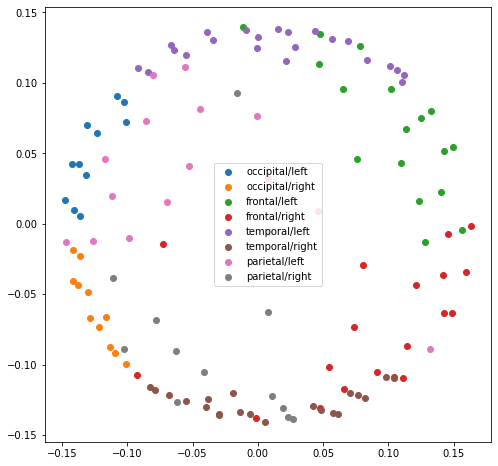

In [48]:

args.montage_path = '/home/yainoue/meg2image/codes/MEG-decoding/data/GOD/montage.csv'
args.ch_region_path =  '/home/yainoue/meg2image/codes/MEG-decoding/data/GOD/ch_region.json'
plt.figure(figsize=(8,8))

montage = []
print('read montage file ', args.montage_path)
with open(args.montage_path) as f:
    reader = csv.reader(f)
    for row in reader:
        montage.append([float(r) for r in row])
loc = np.array(montage)
    
    
print('location size: ', loc.shape)
region_list = args.region
for reg in region_list:
    print(reg)
    args.region = [reg]
    roi_channels = roi(args)
    plt.scatter(loc[roi_channels,0], loc[roi_channels,1], label=reg)
plt.legend()
plt.show()

